In [6]:
!find ~/aryan -type f -name "similarity_medical.npy"


/teamspace/studios/this_studio/aryan/outputs/similarity_medical.npy


In [7]:
import numpy as np, matplotlib.pyplot as plt

path = "/teamspace/studios/this_studio/aryan/outputs/similarity_medical.npy"
sim = np.load(path)

shape: (32, 32)


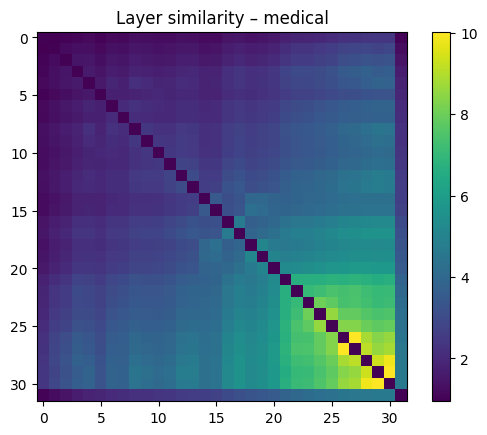

In [8]:
print("shape:", sim.shape)
plt.imshow(sim, interpolation="nearest")
plt.title("Layer similarity – medical")
plt.colorbar()
plt.show()


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# directory where the similarity matrices are saved
base = os.path.expanduser("~/aryan/outputs/similarity_mats")

# pick a task file
task = "medical"
path = os.path.join(base, f"similarity_{task}.npy")

# load and visualize
sim = np.load(path)

print("shape:", sim.shape)

plt.imshow(sim, interpolation="nearest")
plt.title(f"Layer similarity – {task}")
plt.colorbar()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/teamspace/studios/this_studio/aryan/outputs/similarity_mats/similarity_medical.npy'

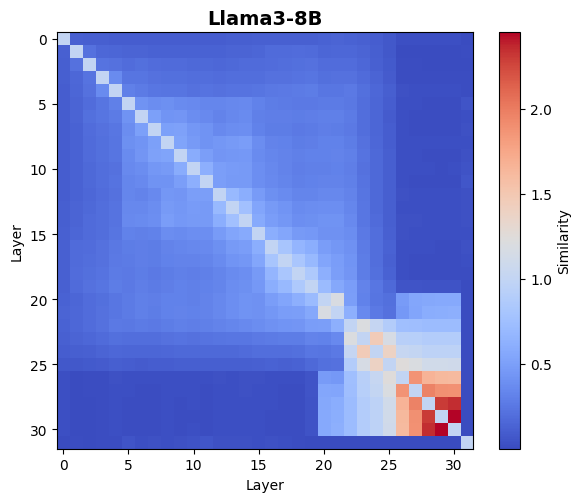

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

base = os.path.expanduser("~/aryan/outputs/similarity_mats")
task = "medical"
path = os.path.join(base, f"similarity_{task}_40s.npy")

sim = np.load(path)

plt.figure(figsize=(6,5))
plt.imshow(sim, cmap="coolwarm", interpolation="nearest")
plt.title("Llama3-8B", fontsize=14, fontweight="bold")
plt.xlabel("Layer")
plt.ylabel("Layer")
plt.colorbar(label="Similarity")
plt.tight_layout()
plt.show()


/tmp/ipykernel_34920/2809353764.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


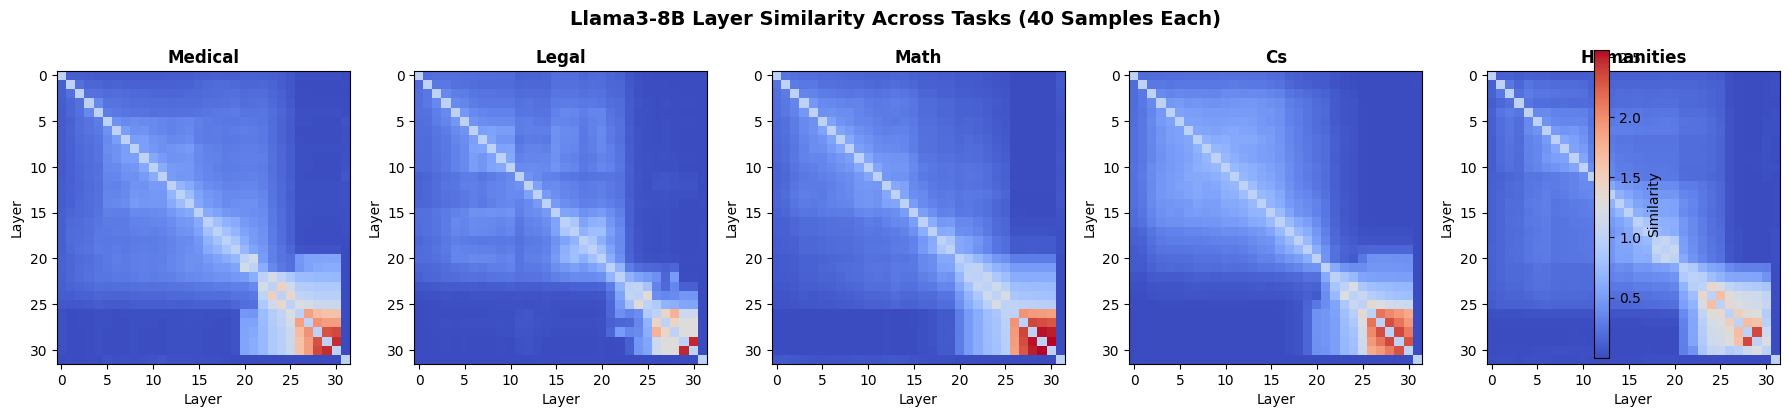

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# base directory
base = os.path.expanduser("~/aryan/outputs/similarity_mats")
tasks = ["medical", "legal", "math", "cs", "humanities"]

# load all matrices
mats = [np.load(os.path.join(base, f"similarity_{t}_40s.npy")) for t in tasks]

# find global min/max for consistent color scale
vmin = min(m.min() for m in mats)
vmax = max(m.max() for m in mats)

# plot side by side
fig, axes = plt.subplots(1, len(tasks), figsize=(18, 4))
for ax, task, sim in zip(axes, tasks, mats):
    im = ax.imshow(sim, cmap="coolwarm", interpolation="nearest", vmin=vmin, vmax=vmax)
    ax.set_title(task.capitalize(), fontsize=12, fontweight="bold")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Layer")

fig.suptitle("Llama3-8B Layer Similarity Across Tasks (40 Samples Each)", fontsize=14, fontweight="bold")
fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.015, pad=0.04, label="Similarity")
plt.tight_layout()
plt.show()
